<a href="https://colab.research.google.com/github/mayurn344/codesoftprojectml/blob/main/credit%20card%20fraud%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [3]:
# Load dataset (Change 'creditcard.csv' with actual file path)
data = pd.read_csv("creditcard.csv")

# Display first 5 rows
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
print(data.isnull().sum())  # Check for missing values


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])  # Scale all features except 'Class'


In [6]:
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}



🔹 Model: Logistic Regression
Accuracy: 0.9992
Precision: 0.8289
Recall: 0.6429
F1-Score: 0.7241
ROC AUC: 0.9599474004570878
--------------------------------------------------


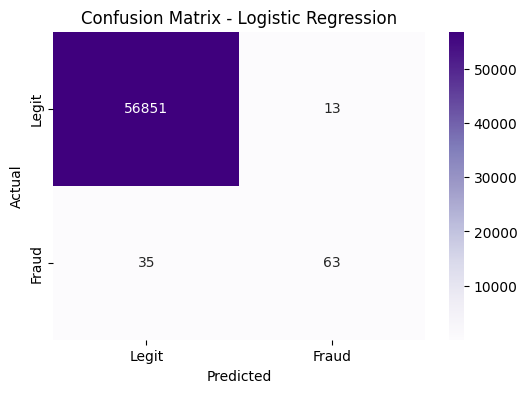


🔹 Model: Decision Tree
Accuracy: 0.9991
Precision: 0.7327
Recall: 0.7551
F1-Score: 0.7437
ROC AUC: 0.8773136118544209
--------------------------------------------------


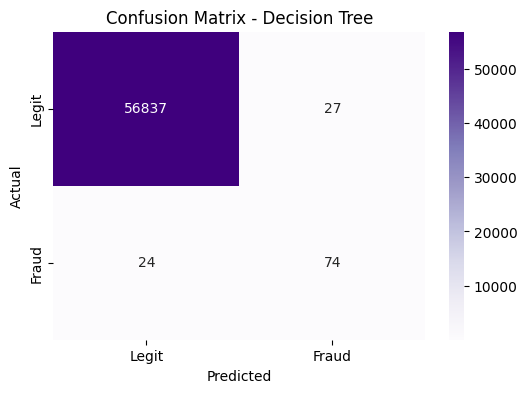


🔹 Model: Random Forest
Accuracy: 0.9996
Precision: 0.9524
Recall: 0.8163
F1-Score: 0.8791
ROC AUC: 0.957775551835816
--------------------------------------------------


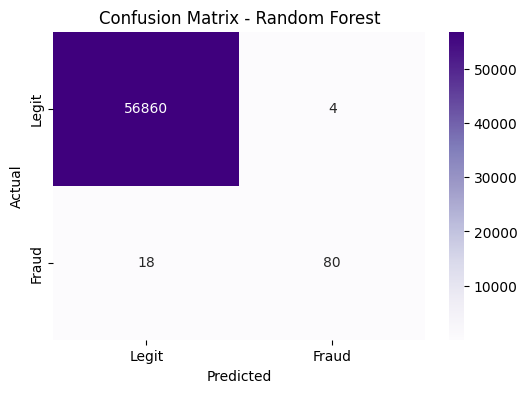

In [8]:
for name, model in models.items():
    model.fit(X_train, y_train)  # Train Model

    y_pred = model.predict(X_test)  # Predictions
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

    print(f"\n🔹 Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc}")
    print("-" * 50)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


In [9]:
# Identify the Best Model Based on Performance Metrics
best_model = None
best_score = 0
best_metric = ""

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 0

    print(f"\n🔹 Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("-" * 50)

    # Determine the best model
    if roc_auc > best_score:
        best_model = name
        best_score = roc_auc
        best_metric = "ROC AUC"

    if precision > best_score:
        best_model = name
        best_score = precision
        best_metric = "Precision"

    if recall > best_score:
        best_model = name
        best_score = recall
        best_metric = "Recall"

# Display the best model based on chosen criteria
print(f"\n🏆 Best Model: {best_model} (Best in {best_metric}: {best_score:.4f})")

# Final Recommendation
if best_metric == "Precision":
    print("✔️ Choose this model if minimizing false positives is crucial (e.g., avoiding flagging legitimate transactions as fraud).")
elif best_metric == "Recall":
    print("✔️ Choose this model if detecting more fraud cases is the priority, even at the cost of some false positives.")
elif best_metric == "ROC AUC":
    print("✔️ Choose this model for the best overall effectiveness in handling class imbalance.")



🔹 Model: Logistic Regression
Accuracy: 0.9992
Precision: 0.8289
Recall: 0.6429
F1-Score: 0.7241
ROC AUC: 0.9599
--------------------------------------------------

🔹 Model: Decision Tree
Accuracy: 0.9991
Precision: 0.7327
Recall: 0.7551
F1-Score: 0.7437
ROC AUC: 0.8773
--------------------------------------------------

🔹 Model: Random Forest
Accuracy: 0.9996
Precision: 0.9524
Recall: 0.8163
F1-Score: 0.8791
ROC AUC: 0.9578
--------------------------------------------------

🏆 Best Model: Logistic Regression (Best in ROC AUC: 0.9599)
✔️ Choose this model for the best overall effectiveness in handling class imbalance.
